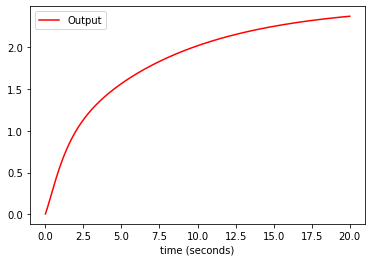

In [1]:
import sys
sys.path.append("../../")
import time

from lib.data.dataplot import *
from lib.utils.time import *

class FirstOrderSystem:
    
    def __init__(self, _a, _b, _c):
        self.a = _a
        self.b = _b
        self.c = _c
        self.y = 0
        
    def evaluate(self, delta_t, _input):
        self.y = self.y - self.b/self.a * delta_t * self.y + self.c/self.a * delta_t * _input
        return self.y
    

class CompoundSystem:
    
    def __init__(self):
        self.s1 = FirstOrderSystem(1,3,4)
        self.s2 = FirstOrderSystem(3,-1,1)
        self.s3 = FirstOrderSystem(1,1,0.5)
        self.y = 0
        
    def evaluate(self, delta_t, _input):
        in_s1 = _input - self.y
        out_s1 = self.s1.evaluate(delta_t, in_s1)
        out_s2 = self.s2.evaluate(delta_t, out_s1)
        out_s3 = self.s3.evaluate(delta_t, _input)
        self.y = out_s2 + out_s3
        return self.y

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("out", "Output")

s = CompoundSystem()
u = 1

t = Time()
t.start()
while t.get() < 20:

    time.sleep(0.01)
    delta_t = t.elapsed()
    
    y = s.evaluate(delta_t, u)
    
    dp.append_x(t.get())
    dp.append_y("out", y)

dp.plot()